In [ ]:
1. Create a straight line dataset using the linear regression formula (weight * X + bias).
- Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
- Split the data into 80% training, 20% testing.
- Plot the training and testing data so it becomes visual.
2. Build a PyTorch model by subclassing nn.Module.
- Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
- Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
- Once you've constructed the model, make an instance of it and check its state_dict().
- Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.
3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
- Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
- Write a training loop to perform the appropriate training steps for 300 epochs.
- The training loop should test the model on the test dataset every 20 epochs.
4. Make predictions with the trained model on the test data.
- Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
- Save your trained model's state_dict() to file.
- Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
- Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.


In [31]:
# Version 1 : with nn.Parameters
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np

In [32]:
class plotting():
        
    def scatter(self,
                X_train,
                y_train,
                X_test,
                y_test,
                prediction=None):
        self.fig, self.axes = plt.subplots(figsize=(8,7))
        # plot training and testing data
        self.axes.scatter(X_train, y_train, c='blue', label='Train Label')
        self.axes.scatter(X_test, y_test, c='black', label='Test Label')
        
        if prediction is not None:
            self.axes.scatter(X_test, prediction, c='yellow', label='Prediction Label')
        
        self.axes.set_ylabel('y')
        self.axes.set_xlabel('x')
        self.axes.legend()
        self.fig.tight_layout()
    
    def plot_losses(self,
                   training_loss,
                   testing_loss,
                   epoch_count):
        self.fig1, self.axes1 = plt.subplots(figsize=(8,7))
        # trainning_loss is in pytorch tensor, and matplotlib works with numpy
        train_loss = np.array(torch.tensor(training_loss).cpu().numpy())
        test_loss = np.array(torch.tensor(testing_loss).cpu().numpy())
        
        self.axes1.plot(epoch_count, train_loss, label='Train Loss')
        self.axes1.plot(epoch_count, test_loss, label='Test Loss')
        #self.axes1.title('Training and test loss curves')
        self.axes1.set_ylabel('Loss')
        self.axes1.set_xlabel('Epochs')
        self.axes1.legend()
        self.fig1.tight_layout()
        
    def show(self):
        plt.show()

In [33]:
        
# 2. Build a PyTorch model by subclassing nn.Module.
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(data=torch.randn(1), requires_grad=True)
        self.bias = nn.Parameter(data=torch.randn(1), requires_grad=True)

    def forward(self, x: torch.Tensor):
        return self.weight * x + self.bias

In [34]:


## 1. Create a straight line dataset using the linear regression formula (weight * X + bias).
weight = 0.3
bias = 0.9
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step, dtype=torch.float)
y = weight * X + bias

print(f"there are {len(X)} datapoints in total")

# split data
split = int(0.8 * len(X))
# train data
X_train = X[:split]
y_train = y[:split]
# test data
X_test = X[split:]
y_test = y[split:]

model_0 = LinearRegression()
print(f"State dict: {model_0.state_dict()}")

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

training_loss = []
testing_loss = []
epoch_count = []

epochs = 10000
for epoch in range(epochs):
    # set model paramters to training mode
    model_0.train()

    #forward pass
    y_preds = model_0(X_train)
    # calculate the loss
    loss = loss_fn(y_preds, y_train)

    # zero grad optimizer
    optimizer.zero_grad()

    # back propagation
    loss.backward()

    # gradient descent
    optimizer.step()

    # Testing
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        # calculate the loss
        test_loss = loss_fn(test_pred, y_test)

        if epoch % 1000 == 0:
            training_loss.append(loss)
            testing_loss.append(test_loss)
            epoch_count.append(epoch)

# print model weights and bias and compare with actual weight and bias
print(f"Original Weight: {weight}\nOriginal Bias: {bias}")
print(f"Model weight and bias: {model_0.state_dict()}")


there are 100 datapoints in total
State dict: OrderedDict([('weight', tensor([-0.9118])), ('bias', tensor([0.9317]))])
Original Weight: 0.3
Original Bias: 0.9
Model weight and bias: OrderedDict([('weight', tensor([0.2930])), ('bias', tensor([0.8968]))])


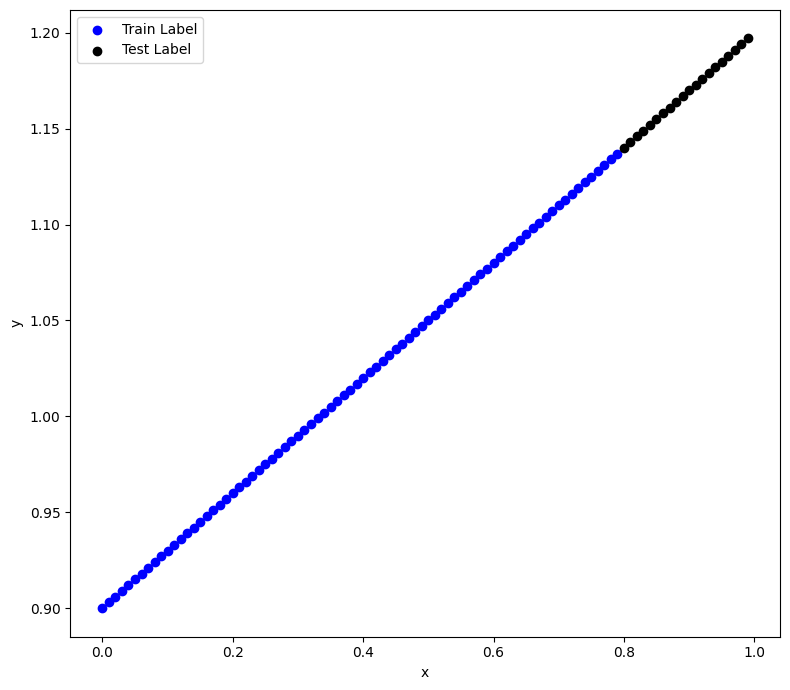

In [35]:
# Plotting training and test data
plotMe = plotting()
plotMe.scatter(X_train, y_train, X_test, y_test)

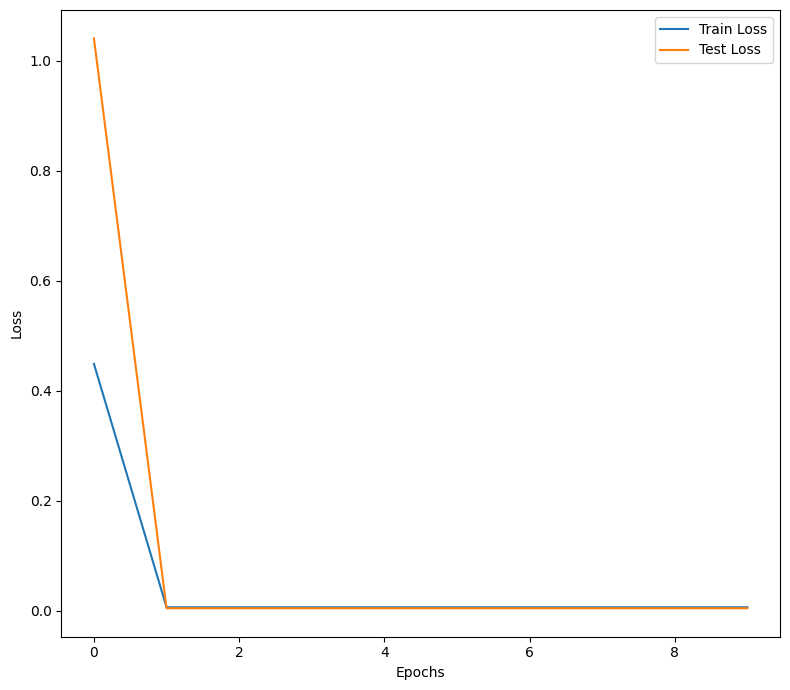

In [36]:
# plot losses
plotMe = plotting()
plotMe.plot_losses(training_loss, testing_loss, np.arange(len(training_loss)))
plotMe.show()

In [37]:

# save the entire model is not recommended.
## torch.save(model_0, "/Users/marcdanielregistre/machine_learning/pytorch/pytorch_lib/linear_regression_fundamental.pt")
# save the model dic
torch.save(model_0.state_dict(), "/Users/marcdanielregistre/machine_learning/pytorch/pytorch_lib/linear_regression_fundamental_state_dict.pt")


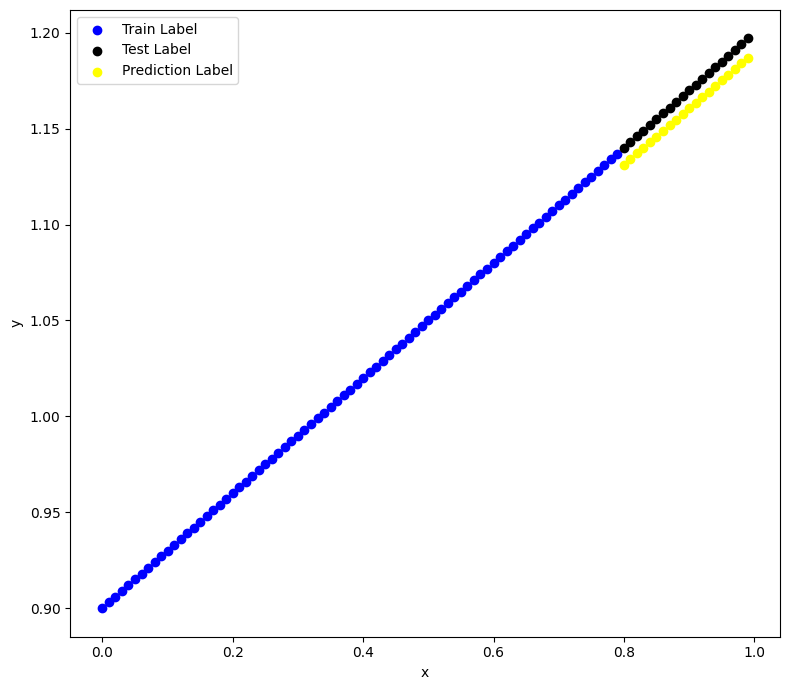

In [38]:
# loading model
plotMe = plotting()
model_00 = LinearRegression()
model_00.load_state_dict(torch.load("/Users/marcdanielregistre/machine_learning/pytorch/pytorch_lib/linear_regression_fundamental_state_dict.pt"))

model_00.eval()
# plot prediction
with torch.inference_mode():
    y_preds_new = model_00(X_test)
    plotMe.scatter(X_train, y_train, X_test, y_test, y_preds_new)

    